In [5]:
%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Note: you may need to restart the kernel to use updated packages.


In [7]:
nls97 = pd.read_csv('data/nls97f.csv', low_memory=False)
nls97.set_index('personid', inplace=True)
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)



In [9]:
def gettots(x):
    out = {}
    out['min'] = x.min()
    out['max'] = x.max()
    out['qr1'] = x.quantile(0.25)
    out['med'] = x.median()
    out['qr3'] = x.quantile(0.75)
    out['count'] = x.count()
    return pd.Series(out)

nls97.groupby(['highestdegree'])['weeksworked21'].apply(gettots).unstack()

,min,max,qr1,med,qr3,count
highestdegree,,,,,,
0. None,0.0,52.0,0.0,39.0,49.0,487.0
1. GED,0.0,52.0,7.0,42.0,50.0,853.0
2. High School,0.0,52.0,27.0,42.0,50.0,2529.0
3. Associates,0.0,52.0,38.0,43.0,49.0,614.0
4. Bachelors,0.0,52.0,40.0,43.0,50.0,1344.0
5. Masters,0.0,52.0,41.0,45.0,52.0,614.0
6. PhD,0.0,52.0,41.0,44.0,49.0,59.0
7. Professional,0.0,52.0,41.0,45.0,51.0,105.0


/var/folders/2c/h3ldckzs7kqgywj5_fsyx0x00000gn/T/ipykernel_4705/1853425685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  myplt = sns.boxplot(x='highestdegree', y='weeksworked21', data=nls97,
/var/folders/2c/h3ldckzs7kqgywj5_fsyx0x00000gn/T/ipykernel_4705/1853425685.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, ha='right')


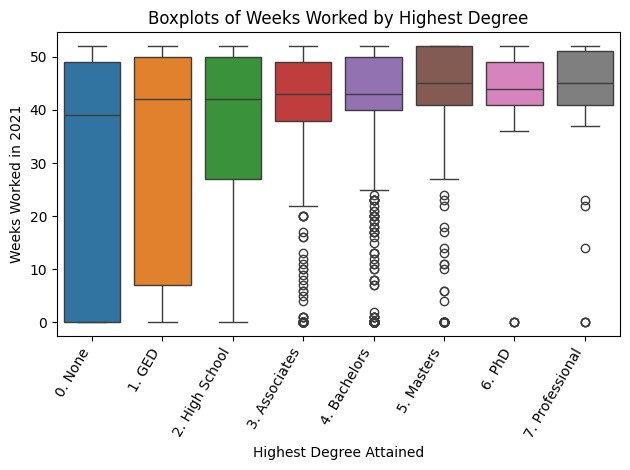

In [11]:
# Create a list of colors for each box
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

myplt = sns.boxplot(x='highestdegree', y='weeksworked21', data=nls97, 
                    order=sorted(nls97['highestdegree'].dropna().unique()),
                    palette=colors)
myplt.set_title('Boxplots of Weeks Worked by Highest Degree')
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked in 2021')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [12]:
covidtotals.groupby(['region'])['total_cases_pm'].apply(gettots).unstack()

,min,max,qr1,med,qr3,count
region,,,,,,
Caribbean,2978.765,626793.139,128448.32125,237966.3375,390757.56400,26.0
Central Africa,434.343,29613.928,2888.17800,4231.7890,9948.22850,11.0
Central America,2319.385,237539.463,38585.09050,70069.7730,206305.61700,7.0
Central Asia,1787.037,162355.888,7145.94950,45454.1385,79794.88000,6.0
East Africa,659.916,507765.419,2018.42950,4061.5760,71435.39950,15.0
East Asia,8294.742,763475.441,26929.77150,69661.3570,285172.58550,15.0
Eastern Europe,104251.871,760161.472,166930.30000,223685.1610,459645.99000,21.0
North Africa,4649.271,93343.329,6057.69400,34140.7660,74463.21000,5.0
North America,60412.236,582158.029,108217.84425,214958.4785,374862.43975,4.0


/var/folders/2c/h3ldckzs7kqgywj5_fsyx0x00000gn/T/ipykernel_4705/681651948.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='total_cases_pm', y='region', data=covidtotals, palette=colors)
/Users/tinle/Labs/DataScience/PythonDataCleansing/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tinle/Labs/DataScience/PythonDataCleansing/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tinle/Labs/DataScience/PythonDataCleansing/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarn

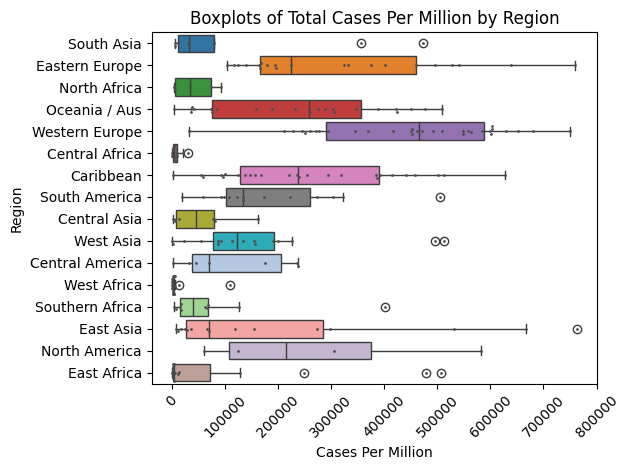

In [14]:
# Create a list of colors for the boxplots
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
          '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94']

sns.boxplot(x='total_cases_pm', y='region', data=covidtotals, palette=colors)
sns.swarmplot(x='total_cases_pm', y='region', data=covidtotals, color='.3', size=2, linewidth=0)
plt.title("Boxplots of Total Cases Per Million by Region")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
highvalue = covidtotals.total_cases_pm.quantile(0.9)
highvalue

np.float64(512388.401)

In [17]:
covidtotals.loc[covidtotals.total_cases_pm >= highvalue, ['location', 'total_cases_pm']]

,location,total_cases_pm
iso_code,,
AND,Andorra,601367.684
AUT,Austria,680262.588
BRN,Brunei,763475.441
CYP,Cyprus,760161.472
DNK,Denmark,583624.930
FRO,Faeroe Islands,652484.139
FRA,France,603427.621
GIB,Gibraltar,628882.700
GRC,Greece,540380.080


/var/folders/2c/h3ldckzs7kqgywj5_fsyx0x00000gn/T/ipykernel_4705/4049765317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='total_cases_pm', y='region', data=covidtotals.loc[covidtotals.total_cases_pm<highvalue], palette=colors)
/Users/tinle/Labs/DataScience/PythonDataCleansing/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tinle/Labs/DataScience/PythonDataCleansing/.conda/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tinle/Labs/DataScience/PythonDataCleansing/.conda/lib/python3.11/site-pac

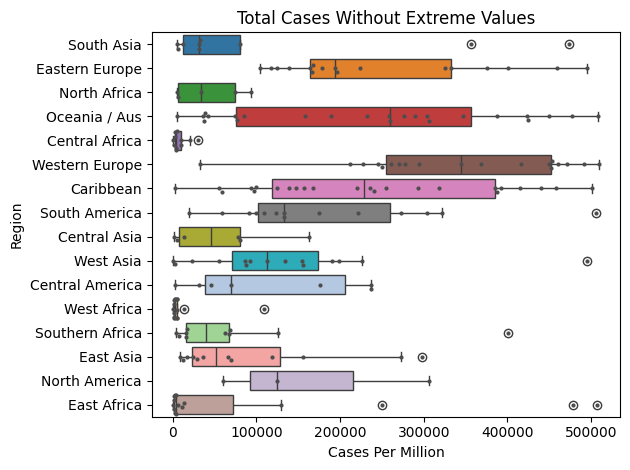

In [19]:
# Create a list of colors for the boxplots
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94']

sns.boxplot(x='total_cases_pm', y='region', data=covidtotals.loc[covidtotals.total_cases_pm<highvalue], palette=colors)
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals.loc[covidtotals.total_cases_pm<highvalue], size=3, color=".3",
linewidth=0)
plt.title("Total Cases Without Extreme Values")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()